In [1]:
import numpy as np
x = np.array([[7,1],
             [1,8],
             [2,0],
              [9,6]
             ])
from sklearn.preprocessing import add_dummy_feature
x_new = add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


In [2]:
#Custom transformers
from sklearn.preprocessing import FunctionTransformer

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ucimlrepo import fetch_ucirepo, list_available_datasets
from sklearn.model_selection import train_test_split
wine_data = pd.read_csv('../wine+quality/winequality-red.csv',sep=";")

In [4]:
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [5]:
transformer = FunctionTransformer(np.log1p,validate=True) # talkes log(1+feature_value)
wine_data_transformed = transformer.transform(np.array(wine_data)) # passing as array 
pd.DataFrame(wine_data_transformed,columns=wine_data.columns).describe().T # matrix to dataframe

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


In [6]:
# observe how data points changes

In [7]:
# polynomial features

from sklearn.preprocessing import PolynomialFeatures
wine_data_copy = wine_data.copy()
wine_data = wine_data.drop(['quality'],axis = 1)
print(wine_data.shape)



(1599, 11)


In [8]:
# lets fit polynomial of degree 2
poly = PolynomialFeatures(degree=2)
poly_wine_data = poly.fit_transform(wine_data)
print(poly_wine_data.shape)

(1599, 78)


In [9]:
poly.get_feature_names_out()# [1 , 11 original , and then combination wil begin]

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

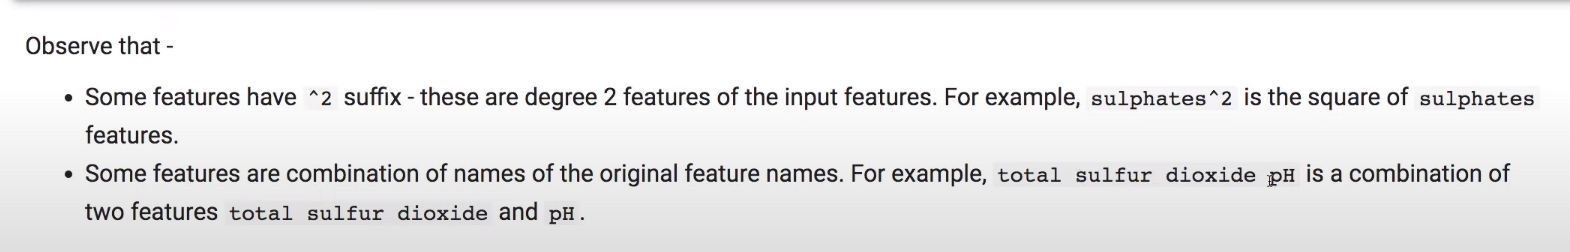

In [10]:
#discretisation
from sklearn.preprocessing import KBinsDiscretizer
wine_data = wine_data_copy.copy()
enc = KBinsDiscretizer(n_bins=10,encode='onehot')
X = np.array(wine_data['chlorides']).reshape(-1,1)
X_binned = enc.fit_transform(X)

In [11]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

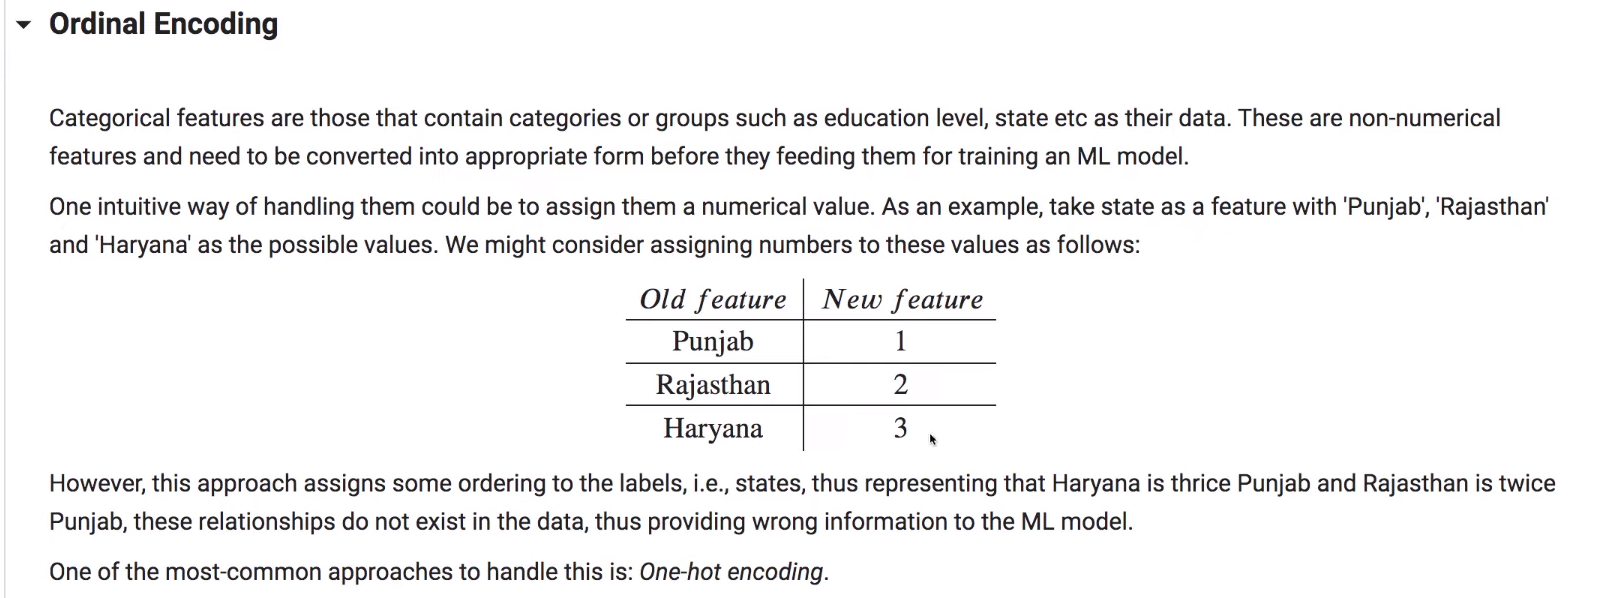

In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [13]:
cols = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
iris_data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',header=None,names=cols)

In [14]:
iris_data.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [16]:
print('Shape of y before encoding', iris_data.label.shape)
onehotencoder = OneHotEncoder(categories='auto')

iris_labels = onehotencoder.fit_transform(iris_data.label.values.reshape(-1,1))

print('Shape of y after encoding',iris_labels.shape)


print(iris_labels.toarray()[:5])

Shape of y before encoding (150,)
Shape of y after encoding (150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [19]:
# now for OrdinalEncoder
enc = OrdinalEncoder()
iris_labels = np.array(iris_data['label'])

iris_labels_transformed = enc.fit_transform(iris_labels.reshape(-1,1))

print("Unique labels:", np.unique(iris_labels_transformed))

print(iris_labels_transformed[:5])

Unique labels: [0. 1. 2.]
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


In [20]:
from sklearn.preprocessing import LabelEncoder
iris_labels = np.array(iris_data['label'])

enc = LabelEncoder()
label_integer = enc.fit_transform(iris_labels)
label_integer

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [21]:
#MultilabelBinarizer
movie_genres = [{'action', 'comedy'},
               {'comedy'},
               {'action','thriller'},
               {
                   'sci-fi','action','thriller'
               }]

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer
mlb = MultiLabelBinarizer()
mlb.fit_transform(movie_genres)

array([[1, 1, 0, 0],
       [0, 1, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 1]])

In [23]:
#Composite Transformers

x = [
    [20.0,'male'],
    [11.2,'female'],
    [15.6,'female'],
    [13.0,'male'],
    [18.6,'male'],
    [16.4,'female'],
]
x = np.array(x)

In [24]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MaxAbsScaler, OneHotEncoder

In [26]:
ct = ColumnTransformer([('scaler',MaxAbsScaler(),[0]),
                        ('pass','passthrough',[0]),# to keep as it is the original for referance see the second col
                        ('encoder',OneHotEncoder(),[1])
                       
                       
                       
                       ])
ct.fit_transform(x)


array([['1.0', '20.0', '0.0', '1.0'],
       ['0.5599999999999999', '11.2', '1.0', '0.0'],
       ['0.78', '15.6', '1.0', '0.0'],
       ['0.65', '13.0', '0.0', '1.0'],
       ['0.93', '18.6', '0.0', '1.0'],
       ['0.82', '16.4', '1.0', '0.0']], dtype='<U32')